In [10]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


One-Hot Encoding:
Plotting the Elbow Method...


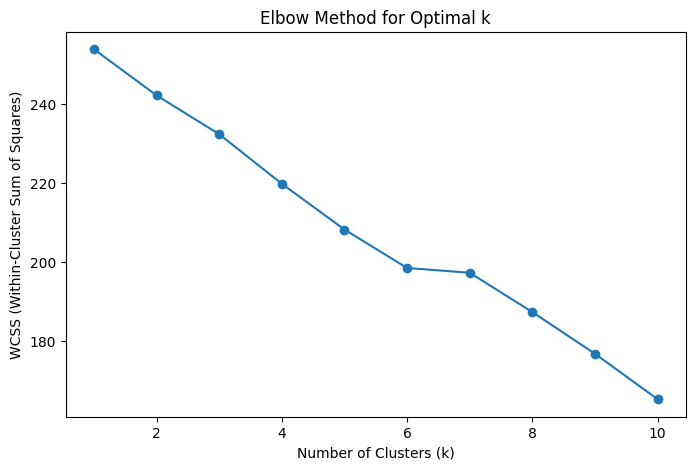

Performing K-Means clustering with k = 6...
Silhouette Score for k = 6: 0.22975854319137637
   uid                                               name  cluster
0    1  Some computer science issues in ubiquitous com...        1
1    2                      Computer science: An overview        2
2    3                    Foundations of computer science        2
3    4                       Is computer science science?        0
4    5   Computer science and its relation to mathematics        2


In [4]:
#one hot encoding with kmeans

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

def preprocess_text(text, stop_words, lemmatizer):
    #Preprocess the text by removing stopwords and lemmatizing the words
    words = text.split() 
    cleaned_words = [
        lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words
    ]
    return " ".join(cleaned_words)

def preprocess_dataset(dataset):
    #Preprocessing 'name' and 'keywords'
    stop_words = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()

    dataset['name_cleaned'] = dataset['name'].apply(lambda x: preprocess_text(str(x), stop_words, lemmatizer))
    dataset['keywords_cleaned'] = dataset['keywords'].apply(lambda x: preprocess_text(str(x), stop_words, lemmatizer))

    dataset['combined_text'] = dataset['name_cleaned'] + " " + dataset['keywords_cleaned']
    return dataset

def one_hot_encode(dataset):
    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoded = onehot_encoder.fit_transform(dataset['combined_text'].values.reshape(-1, 1))
    onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out())
    return onehot_df

#returns cluster labels and the KMeans model.
def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    return labels, kmeans

# Evaluate clustering with Silhouette Score
def evaluate_clustering(data, labels):
    score = silhouette_score(data, labels)
    return score

#to determine the optimal number of clusters
def plot_elbow_method(data, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)  # Inertia: sum of squared distances to centroids
    
    # Plot the distortions
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

def main_clustering(data, n_clusters):
    # Plot Elbow Method to decide the optimal number of clusters
    print("Plotting the Elbow Method...")
    plot_elbow_method(data)

    # Perform K-Means clustering
    print(f"Performing K-Means clustering with k = {n_clusters}...")
    labels, kmeans = perform_kmeans(data, n_clusters)
    #print(f"Cluster Centers:\n{kmeans.cluster_centers_}")
    
    # Evaluate clustering
    silhouette = evaluate_clustering(data, labels)
    print(f"Silhouette Score for k = {n_clusters}: {silhouette}")
    
    return labels, kmeans

dataset = pd.read_csv('new_dataset.csv')
processed_dataset = preprocess_dataset(dataset)
#print(processed_dataset)
onehot_df = one_hot_encode(processed_dataset)
print("One-Hot Encoding:")
#print(onehot_df.head())

n_clusters = 6
cluster_labels, kmeans_model = main_clustering(onehot_df, n_clusters)
processed_dataset['cluster'] = cluster_labels
print(processed_dataset[['uid', 'name', 'cluster']].head())
#print(processed_dataset[['uid', 'name', 'cluster']])
